EDIT OVERVIEW OF PROJECT

In [1]:
# Import packages needed for analysis of data
import pandas as pd
import plotly.express as px
import re
from matplotlib import pyplot as plt 
import numpy as np 
from scipy import stats 
import seaborn as sns

In [2]:
# Print info of DataFrame to get all attributes of table at once
DF = pd.read_csv("Life Expectancy Data.csv")
print(DF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [3]:
# It is good practice to ensure all columns follow the same name structure, so we need to ensure they are all string, lowercase, and without any white spaces.
DF.columns = DF.columns.str.strip().str.lower()

In [4]:
# Ensure that columns are all strings, lower cases, and have no white spaces.
print(DF.columns)

Index(['country', 'year', 'status', 'life expectancy', 'adult mortality',
       'infant deaths', 'alcohol', 'percentage expenditure', 'hepatitis b',
       'measles', 'bmi', 'under-five deaths', 'polio', 'total expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness  1-19 years',
       'thinness 5-9 years', 'income composition of resources', 'schooling'],
      dtype='object')


In [5]:
# Now that leading and trailing spaces have been removed, can rename all columns
DF = DF.rename(
    columns={
        'life expectancy': 'life_expect',
        'adult mortality': 'adult_mortal',
        'infant deaths': 'infant_death',
        'percentage expenditure': 'percent_expend',
        'hepatitis_b': 'hep_b',
        'measles_': 'measles',
        '_bmi_': 'bmi',
        'under-five deaths': 'under_five_deaths',
        'total expenditure': 'total_expend',
        'diptheria ': 'diptheria',
        '_hiv/aids': 'hiv/aids',
        'thinness  1-19 years' : 'thinness_1-19_yrs',
        'thinness 5-9 years': 'thinness_5-9_yrs',
        'income composition of resources': 'income_comp_resources'

    }
)

In [6]:
print(DF.columns)

Index(['country', 'year', 'status', 'life_expect', 'adult_mortal',
       'infant_death', 'alcohol', 'percent_expend', 'hepatitis b', 'measles',
       'bmi', 'under_five_deaths', 'polio', 'total_expend', 'diphtheria',
       'hiv/aids', 'gdp', 'population', 'thinness_1-19_yrs',
       'thinness_5-9_yrs', 'income_comp_resources', 'schooling'],
      dtype='object')


In [ ]:
# Due to the large amount of data, create dataframes for Developed and Developing countries, to analyze the data and then make an overall analysis considering both dataframes. This will be much easier to analyze.

In [27]:
# Create DF for Developed countries
DF_Developed = DF[DF['status'] == 'Developed']

# Print sample of DF_Developedto ensure DF_Developed was properly created
print(DF_Developed.sample(10))

          country  year     status  life_expect  adult_mortal  infant_death  \
648       Croatia  2008  Developed         76.0         116.0             0   
141       Austria  2002  Developed         78.7           9.0             0   
2350     Slovenia  2010  Developed         79.5          87.0             0   
116     Australia  2011  Developed         82.0          63.0             1   
1287        Italy  2010  Developed         81.8           6.0             2   
137       Austria  2006  Developed         79.8          81.0             0   
2068     Portugal  2002  Developed         77.2          17.0             1   
2516       Sweden  2004  Developed         83.0           7.0             0   
1837  Netherlands  2007  Developed         82.0          68.0             1   
2070     Portugal  2000  Developed         76.6          11.0             1   

      alcohol  percent_expend  hepatitis b  measles  ...  polio  total_expend  \
648     12.06     2425.403891         97.0       

In [ ]:
# Get more information by using info() method on DF_Developed
print(DF_Developed.info())

<class 'pandas.core.frame.DataFrame'>
Index: 512 entries, 112 to 2809
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                512 non-null    object 
 1   year                   512 non-null    int64  
 2   status                 512 non-null    object 
 3   life_expect            512 non-null    float64
 4   adult_mortal           512 non-null    float64
 5   infant_death           512 non-null    int64  
 6   alcohol                484 non-null    float64
 7   percent_expend         512 non-null    float64
 8   hepatitis b            339 non-null    float64
 9   measles                512 non-null    int64  
 10  bmi                    512 non-null    float64
 11  under_five_deaths      512 non-null    int64  
 12  polio                  512 non-null    float64
 13  total_expend           480 non-null    float64
 14  diphtheria             512 non-null    float64
 15  hiv/aids

In [31]:
#Find missing values within this DF
print(DF_Developed.isna().sum())

country                    0
year                       0
status                     0
life_expect                0
adult_mortal               0
infant_death               0
alcohol                   28
percent_expend             0
hepatitis b              173
measles                    0
bmi                        0
under_five_deaths          0
polio                      0
total_expend              32
diphtheria                 0
hiv/aids                   0
gdp                       64
population                96
thinness_1-19_yrs          0
thinness_5-9_yrs           0
income_comp_resources     48
schooling                 48
dtype: int64


In [ ]:
# For missing data, NaN could mean that the number is not a valid numeric number. It could be too small to compute, and there is a possibility that due to such a large amount of data over a large time span, information could have been lost or improperly entered due to human error.
# We could look for duplicates within this DF but that seems arbitrary due to the fact that information for the same country would be taken at multiple different times so duplicates are to be expected.

In [ ]:
# Create DF for Developing countries
DF_Developing = DF[DF['status'] == 'Developing']

#Ensure DF was properly created
print(DF_Developing)

          country  year      status  life_expect  adult_mortal  infant_death  \
0     Afghanistan  2015  Developing         65.0         263.0            62   
1     Afghanistan  2014  Developing         59.9         271.0            64   
2     Afghanistan  2013  Developing         59.9         268.0            66   
3     Afghanistan  2012  Developing         59.5         272.0            69   
4     Afghanistan  2011  Developing         59.2         275.0            71   
...           ...   ...         ...          ...           ...           ...   
2933     Zimbabwe  2004  Developing         44.3         723.0            27   
2934     Zimbabwe  2003  Developing         44.5         715.0            26   
2935     Zimbabwe  2002  Developing         44.8          73.0            25   
2936     Zimbabwe  2001  Developing         45.3         686.0            25   
2937     Zimbabwe  2000  Developing         46.0         665.0            24   

      alcohol  percent_expend  hepatiti

In [ ]:
# Get more information about DF_Developing using info()
print(DF_Developing.info()) 

<class 'pandas.core.frame.DataFrame'>
Index: 2426 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                2426 non-null   object 
 1   year                   2426 non-null   int64  
 2   status                 2426 non-null   object 
 3   life_expect            2416 non-null   float64
 4   adult_mortal           2416 non-null   float64
 5   infant_death           2426 non-null   int64  
 6   alcohol                2260 non-null   float64
 7   percent_expend         2426 non-null   float64
 8   hepatitis b            2046 non-null   float64
 9   measles                2426 non-null   int64  
 10  bmi                    2392 non-null   float64
 11  under_five_deaths      2426 non-null   int64  
 12  polio                  2407 non-null   float64
 13  total_expend           2232 non-null   float64
 14  diphtheria             2407 non-null   float64
 15  hiv/aids 

In [ ]:
# Look into missing data within the DF_Developing DF
print(DF_Developing.isna().sum())

country                    0
year                       0
status                     0
life_expect               10
adult_mortal              10
infant_death               0
alcohol                  166
percent_expend             0
hepatitis b              380
measles                    0
bmi                       34
under_five_deaths          0
polio                     19
total_expend             194
diphtheria                19
hiv/aids                   0
gdp                      384
population               556
thinness_1-19_yrs         34
thinness_5-9_yrs          34
income_comp_resources    119
schooling                115
dtype: int64


In [ ]:
# It is interesting the contrast in missing values for Developed and Developing countries, it does make sense that more data would be missing from Developing countries as they do not have the infrastructure or technological advances as Developed countries have. 
# Data could be missing from incomputable numbers, human error with inputing data, as well as lost information over the time span in which data was collected. 

In [ ]:
# Look at how various predicting factors, already chosen, affect the life expectancy; then determine the most influential factors on the life expectancy for this chosen time period.
# Analyze Biological Factors first, these include: alcohol, hep_b, measles, polio, diptheria, hiv/aids, both categories for thinness, as well as bmi
# Assess these biological factors against the life_expect, as well as adult_mortal, and conclude if there is a correlation between them


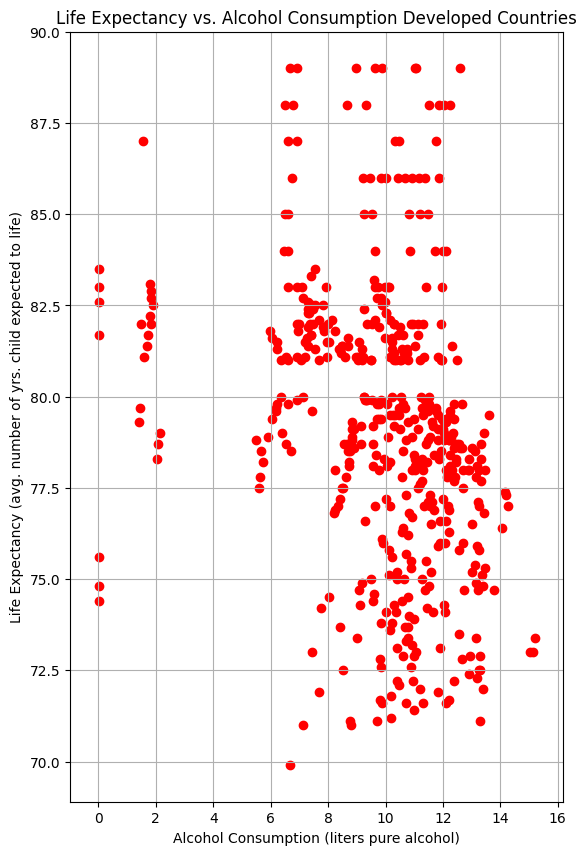

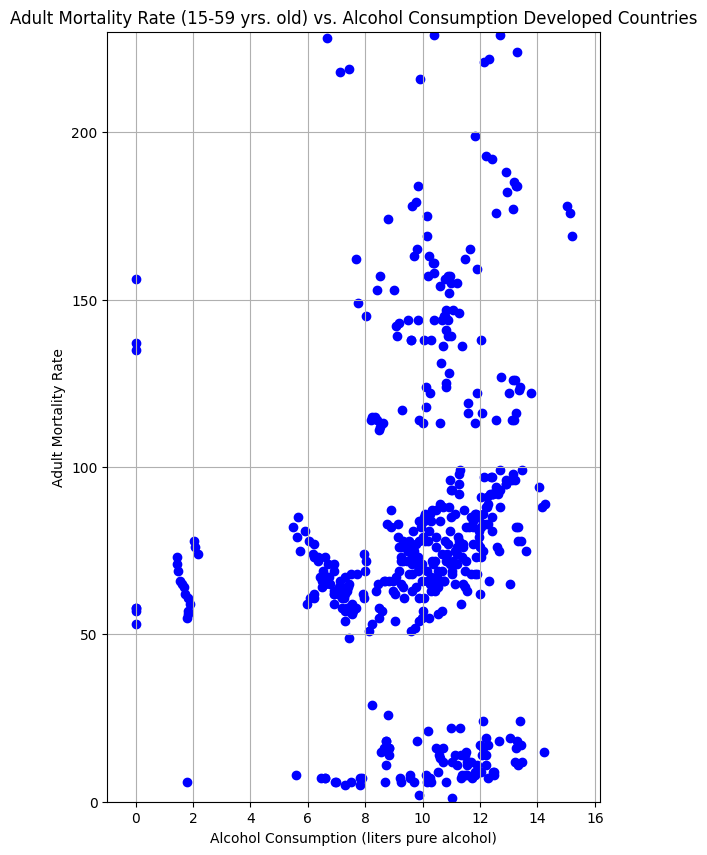

In [54]:
# How does consumption of alcohol per capita (liters of pure alcohol) impact Developed countries
#Create the scatter charts

# Chart for alcohol vs. life_expect
plt.figure(figsize=[14,10]) #Building a larger figure due to range of data
plt.subplot(1,2,1)
plt.scatter(DF_Developed['alcohol'], DF_Developed['life_expect'], color='red') #Creating first scatterplot
plt.title('Life Expectancy vs. Alcohol Consumption Developed Countries') #Title of chart
plt.xlabel('Alcohol Consumption (liters pure alcohol)')
plt.ylabel('Life Expectancy (avg. number of yrs. child expected to life)')
plt.xlim(DF_Developed['alcohol'].min() - 1, DF_Developed['alcohol'].max() + 1) #This will create the numerical scale for the x-axis based off the minimum and maximum values within the dataset
plt.ylim(DF_Developed['life_expect'].min() - 1, DF_Developed['life_expect'].max() + 1) #This will create the numerical scale for the y-axis based off the minimum and maximum values within the dataset
plt.grid(True) #This will display the grid on the graph

# Chart for alcohol vs. adult_mortal
plt.figure(figsize=[14,10])
plt.subplot(1,2,2)
plt.scatter(DF_Developed['alcohol'], DF_Developed['adult_mortal'], color='blue') 
plt.title('Adult Mortality Rate (15-59 yrs. old) vs. Alcohol Consumption Developed Countries')
plt.xlabel('Alcohol Consumption (liters pure alcohol)')
plt.ylabel('Adult Mortality Rate')
plt.xlim(DF_Developed['alcohol'].min() - 1, DF_Developed['alcohol'].max() + 1)
plt.ylim(DF_Developed['adult_mortal'].min() - 1, DF_Developed['adult_mortal'].max() + 1)
plt.grid(True)



In [55]:
# From looking at these scatter plots there does not seem to be a strong correlation in either direction, positive or negative, between alcohol consumption in developed countries and life expectancy/adult mortality. 
# Find the correlation coefficient between these variables

# Coefficient for life expectancy
life_expect_alc_correlation = DF_Developed['life_expect'].corr(DF_Developed['alcohol'])
print(f"The correlation coefficient for life expectancy in Developed Countries is: {life_expect_alc_correlation :.2f}")

# Coefficient for adult mortality
adult_mortal_alc_correlation = DF_Developed['adult_mortal'].corr(DF_Developed['alcohol'])
print(f"The correlation coefficient for adult mortality in Developed Countries is : {adult_mortal_alc_correlation :.2f}")


The correlation coefficient for life expectancy in Developed Countries is: -0.29
The correlation coefficient for adult mortality in Developed Countries is : 0.14


In [22]:
# Put in analysis of results of graphs and correlation coefficients